In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.io.wavfile as wavfile
from scipy import signal
from scipy.signal import spectrogram
from scipy.fftpack import fft
from pydub import AudioSegment
import os

In [164]:
dev_path = 'dsl_data/development.csv'
eval_path = 'dsl_data/evaluation.csv'


In [165]:
def load_dataframe(path):
    df = pd.read_csv(path)
    # Dataframe exploration
    print('***** DATAFRAME INFO *****\n')
    print(df.info())
    print('\n\n***** HEAD *****\n')
    print(df.head())
    print('\n\n ***** POSSIBLE CLASSIFICATION OUTCOMES *****\n')
    print(df.groupby(['action', 'object']).size())
    sampleRates = list()
    audios = list()
    for i in range(0, df.shape[0]):
        audio_path = df['path'].loc[i]
        sampleRates.append(get_sample_rate(audio_path))
        audios.append(get_audio_data(audio_path))
    df['SampleRates'] = sampleRates
    df['AudioData'] = audios
    print('\n\n ***** SAMPLE RATES *****')
    print(df.groupby(['SampleRates']).size())
    return df

def get_sample_rate(filepath):
    sr, audio = wavfile.read(filepath)
    return sr

def get_audio_data(filepath):
    sr, audio = wavfile.read(filepath)
    return audio


def edit_sample_rates(goal_sr):
    for index, row in df.iterrows():
    # Load the audio file
        audio = AudioSegment.from_file(row['path'])
    # Check if the sample rate is different from the target sample rate
        if audio.frame_rate != goal_sr:
            # Convert the sample rate to the target sample rate
            audio = audio.set_frame_rate(goal_sr)
            # get file format
            file_format = os.path.splitext(row['path'])[1][1:]
            # Save the converted audio
            audio.export(row['path'], format=file_format)
    sampleRates = list()
    for i in range(0, df.shape[0]):
        audio_path = df['path'].loc[i]
        sampleRates.append(get_sample_rate(audio_path))
    df['SampleRates'] = sampleRates
    print(df.groupby(['SampleRates']).size())

# definition of functions to represent each audio 

def plot_spectrogram(audio_data, sr):
    frequencies, times, spec = spectrogram(audio_data, fs=sr)
    plt.pcolormesh(times, frequencies, 10*np.log10(spec)) #changed the scale to dB
    plt.colorbar()
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()
    return spec, len(audio)


def plot_time_dimension(audio_data, sr):
    audioArray = np.array(audio_data)
    duration = len(audio) / sr
    # Create the time axis in seconds
    time = np.linspace(0, duration, len(audio))
    plt.plot(time, audioArray)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    
def plot_freq_dimension(audio_data, sr):
    audioArray = np.array(audio_data)
    freqArray = np.abs(fft(audioArray))
    decibels = 20 * np.log10(freqArray)
    plt.figure(figsize=(10,4))
    plt.plot(decibels)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.show()
    



In [166]:
df = load_dataframe(dev_path)

***** DATAFRAME INFO *****

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9854 entries, 0 to 9853
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Id                                     9854 non-null   int64 
 1   path                                   9854 non-null   object
 2   speakerId                              9854 non-null   object
 3   action                                 9854 non-null   object
 4   object                                 9854 non-null   object
 5   Self-reported fluency level            9854 non-null   object
 6   First Language spoken                  9854 non-null   object
 7   Current language used for work/school  9854 non-null   object
 8   gender                                 9854 non-null   object
 9   ageRange                               9854 non-null   object
dtypes: int64(1), object(9)
memory usage: 770.0+ KB
None


**

In [167]:
target_rate = 16000
edit_sample_rates(target_rate) #bring all sr's to 16kHz

SampleRates
16000    9854
dtype: int64


In [168]:
df.head()

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange,SampleRates,AudioData
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40,16000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [169]:
def plot_all_audios(df):
    lengths = list()
    fig, ax = plt.subplots(1,1)
    for ind in range(0, len(df)):
        audio = df['AudioData'].loc[ind]
        sr = df['SampleRates'].loc[ind]
        audioArray = np.array(audio)
        duration = len(audio) / sr
        time = np.linspace(0, duration, len(audio))
        ax.plot(time, audioArray, alpha=0.5)
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time [s]")
    plt.show()
  

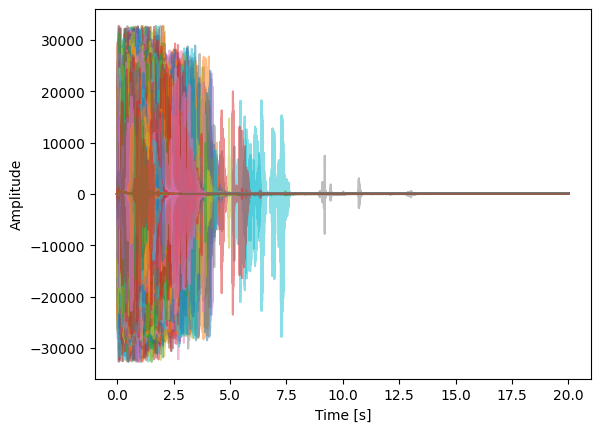

In [170]:
plot_all_audios(df)


In [189]:
def split_spectrogram(audio, sr, n_blocks):
    frequencies, times, spec = spectrogram(audio, fs=sr)
    times = (times * 1000).astype(int) #milliseconds
    frequencies = frequencies.astype(int)
    fig, ax = plt.subplots(1,1)
    plt.pcolormesh(times, frequencies, 10*np.log10(spec)) #changed the scale to dB
    plt.colorbar()
    time_bounds = list()
    freq_bounds = list()
    #n_blocks is the same vertically and horizontally
    #starting from vertical lines to create time bins:
    v_step = int(times[len(times)-1] / n_blocks)
    
    for v in range(0, times[len(times)-1], v_step):
        ax.axvline(v, color = 'red')
        time_bounds.append(v)
    #and then horizontal lines to create frequency bins:
    h_step = int(frequencies[len(frequencies)-1]/n_blocks)
    for h in range(0, frequencies[len(frequencies)-1], h_step):
        ax.axhline(h, color = 'red')
        freq_bounds.append(h)
        
    
    # Split the matrix into sub-arrays of size N along the first axis (rows)
    rows_blocks = np.array_split(spec, n_blocks, axis=0)
    #this is a list: each element of the list is a sub-matrix obtained slicing horizontally the spectrogram
    # into n_blocks slices

    # Split the sub_matrices into sub-arrays of size NxN along the second axis (columns)
    blocks = [ np.array_split(block, n_blocks, axis=1) for block in rows_blocks]
    #This is, instead, a list of lists: the first element is a list containing all the blocks obtained from 
    #the first vertical slice


    # Initialize arrays to store the mean and standard deviation of each block
    block_means = np.zeros((n_blocks,n_blocks))
    block_stds = np.zeros((n_blocks,n_blocks))

    # Iterate over blocks
    for i in range(0, n_blocks):
        for j in range(0, n_blocks):
            # Compute mean and standard deviation of the block
             #i is the index of the horizontal split  (indicating which column)
            block = blocks[i][j] #j is the index of the vertical split (indicating which row)
            mean = np.mean(block)
            std = np.std(block)
            block_means[i,j] = mean
            block_stds[i,j] = std
    plt.xlabel("Time (ms)")
    plt.xlim(left=0)
    plt.ylabel("Frequency (Hz)")
    plt.show()
    return block_means, block_stds, blocks

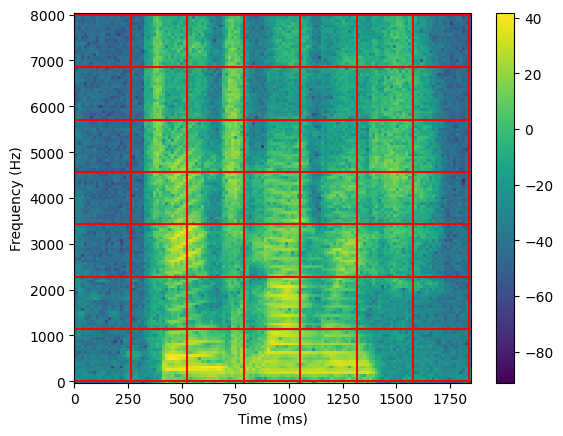

In [190]:
 avg, std_dev, blocks = split_spectrogram(df['AudioData'].loc[0], df['SampleRates'].loc[0], 7)

In [191]:
avg

array([[3.02114151e-03, 4.47144684e+02, 5.34698303e+02, 3.53419006e+02,
        2.65503815e+02, 3.54775963e+01, 2.79979897e-03],
       [9.61953425e-04, 2.64356017e+00, 1.26033580e+00, 2.36499161e+02,
        4.46640921e+00, 1.35743916e-01, 1.11565981e-02],
       [1.69032573e-04, 2.08977692e+02, 5.61042404e+01, 2.17512989e+01,
        2.32271194e+01, 1.02875412e+00, 2.82459594e-02],
       [9.08299917e-05, 1.93983040e+01, 1.42254601e+01, 4.89650917e+00,
        1.78332853e+00, 4.74329615e+00, 2.11712569e-01],
       [9.14723278e-05, 1.19358492e+01, 1.34936924e+01, 7.37270951e-01,
        1.84629634e-01, 3.05265737e+00, 7.43939504e-02],
       [7.53234781e-05, 3.19165826e+00, 7.63929367e+00, 2.50292681e-02,
        5.78181520e-02, 8.81312966e-01, 2.28207037e-02],
       [5.06264114e-05, 1.42704785e+00, 2.34564447e+00, 1.30259693e-01,
        9.34351534e-02, 4.76612836e-01, 5.68679906e-03]])

In [192]:
std_dev

array([[1.82100460e-02, 1.50794958e+03, 1.82468530e+03, 7.27139709e+02,
        5.16024841e+02, 2.06723099e+02, 5.73942810e-03],
       [2.88074790e-03, 7.75138521e+00, 2.82774878e+00, 5.81195496e+02,
        1.47538862e+01, 5.69272518e-01, 5.84353507e-02],
       [3.37001577e-04, 6.93912537e+02, 2.65199829e+02, 4.99582558e+01,
        7.64947662e+01, 2.62316346e+00, 9.65597332e-02],
       [1.60906100e-04, 5.41228790e+01, 4.23374100e+01, 9.92438030e+00,
        3.92146587e+00, 1.24899530e+01, 7.23723412e-01],
       [1.61714182e-04, 3.46320381e+01, 3.77558441e+01, 2.13116789e+00,
        5.46895981e-01, 6.42642260e+00, 2.04608887e-01],
       [1.03867649e-04, 1.06427898e+01, 2.21253414e+01, 8.65658745e-02,
        1.15742072e-01, 1.47735786e+00, 6.61128908e-02],
       [5.93416080e-05, 4.03089190e+00, 7.66315031e+00, 2.37771779e-01,
        2.30977476e-01, 7.99147129e-01, 2.22179536e-02]])

In [175]:
matr = np.array(([0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14], [15,16,17,18,19]))
print(matr)
rows_blocks = np.array_split(matr,2, axis=0)
print(rows_blocks)
blocks = [ np.array_split(block, 5, axis=1) for block in rows_blocks]
print(blocks)
block_means = np.zeros((2,5))
block_stds = np.zeros((2,5))

for i in range(0, 2):
        for j in range(0, 5):
            # Compute mean and standard deviation of the block
             #i is the index of the horizontal split  (indicating which column)
            block = blocks[i][j] #j is the index of the vertical split (indicating which row)
            mean = np.mean(block)
            std = np.std(block)
            block_means[i,j] = mean
            block_stds[i,j] = std
print(block_means)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]]), array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])]
[[array([[0],
       [5]]), array([[1],
       [6]]), array([[2],
       [7]]), array([[3],
       [8]]), array([[4],
       [9]])], [array([[10],
       [15]]), array([[11],
       [16]]), array([[12],
       [17]]), array([[13],
       [18]]), array([[14],
       [19]])]]
[[ 2.5  3.5  4.5  5.5  6.5]
 [12.5 13.5 14.5 15.5 16.5]]
